# Introduction

Hi, this is a capstone project that i completed at Flatiron School. This projects main focus is completing the data science process and then taking it a step further to create a impressive capstone project. For my project, I decided to create a Music Recommender App for this I had to extract features from the data using neural network models, perform clustering to get a sense of which songs were most similar to each other and then perform machine learning again to ensure that the clustering that was done wasnt a fluke and in scaleable for larger amounts of data.

In this Notebook, I am doing the premptive steps of that process as here will be an overview of all the datasets that I will be working with along with examples of how the modeling and recommender systems take place

# Table of Contents
- [Introduction](#Introduction)
- [Imports](#Imports)
- [Datasets](#Datasets)
- [`bp_genre`](#`bp_genre`)
- [`bp_key`](#`bp_key`)
- [`bp_song`](#`bp_song`)
- [`bp_tabular`](#`bp_tabular`)
- [`bp_track_media`](#`bp_track_media`)
- [`bp_rgb`](#`bp_rgb`)
- [`bp_track`](#`bp_track`)
- [`bp_sample_uuid`](#`bp_sample_uuid`)

# Imports

First thing to do is imports, here is a list of the different packages I will be using and also why I'm using them
- `import pandas as pd` -> Pandas is using for tabular data manipulation. I will use it to load in all of the datasets and then also use it to change and adjust them as time goes on
- `import matplotlib.pyplot as plt` -> MatPlotLib is a package in python used for graphing and that is exactly what I plan to use it for
- `import seaborn as sns` -> Seaborn is another package used for graphing that is built on top of the `matplotlib` package, I plan to use these in combinations\
- `from scipy import stats` -> Scipy and Stats asre used to perform statistical tests such as ANOVA tests
- `import numpy as np` -> NumPy is a package used to perform mathematical functions such as mean, median and mode.
- `import os` -> The os module in Python provides functions for interacting with the operating system, allowing tasks like file manipulation, path handling, process management, and accessing environment variables in a platform-independent way.
- `from PIL import Image` -> The PIL.Image module in Python (from the Pillow library) provides tools for opening, manipulating, and saving image files, enabling tasks such as resizing, cropping, and converting between image formats.
- `from IPython.display import Audio` -> The IPython.display.Audio module allows you to embed and control audio playback directly in a Jupyter notebook or IPython environment, supporting audio files or raw audio data.
- `import librosa` -> librosa is a Python library for audio and music analysis, providing tools for tasks such as feature extraction (e.g., MFCCs, chroma), audio processing (e.g., resampling, filtering), and visualization (e.g., waveforms, spectrograms).
- `import warnings` -> Warnings is exactly what it sounds like. my goal with this is to hide all useless warnings that would otherwise just take up space in the notebook

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os
from PIL import Image
from IPython.display import Audio
import librosa
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

# Datasets
All the data was originally collected and found on kaggle [here](https://www.kaggle.com/datasets/mcfurland/10-m-beatport-tracks-spotify-audio-features). some of the datasets are custom built by me so if not all of the ones you see here are on that website, that is the reasoning. Also, not all of the datasets at that link were using in my project, I am only covering the datasets that i used in my project

Now that we have our Imports, we can move onto loading our datasets and getting to work!

In [115]:
bp_genre = pd.read_csv('data/bp_genre.csv')
bp_key = pd.read_csv('data/bp_key.csv')
bp_song = pd.read_csv('data/bp_song.csv')
bp_tabular = pd.read_csv('data/bp_tabular.csv')
bp_track_media = pd.read_csv('data/bp_track_media.csv')
bp_rgb = pd.read_csv('data/bp_rgb.csv')
bp_track = pd.read_csv('data/bp_track.csv')
bp_sample_uuid = pd.read_csv('data/sample_uuid.csv')

________

# `bp_genre`

We are going to start with the first dataset that I uploaded, `bp_genre`.

In [116]:
bp_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre_id    32 non-null     int64 
 1   genre_name  32 non-null     object
 2   song_count  32 non-null     int64 
 3   genre_url   32 non-null     object
 4   updated_on  32 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.4+ KB


In [117]:
bp_genre.head(2)

,genre_id,genre_name,song_count,genre_url,updated_on
0,8,Hard Dance / Hardcore,178646,/genre/hard-dance-hardcore/8,2023-09-19 15:01:03
1,50,Nu Disco / Disco,157934,/genre/nu-disco-disco/50,2023-09-19 15:01:03


Right away we can see that `bp_genre` has 5 columns:

- `genre_id` -> This is an id number linked to the genre name, the numbers are barely considered integers as they are only used to signify a specific genre name and have no value outside of that
- `genre_name` -> This is exactly what it sounds like, its the genre's name
- `song_count` -> Again, exactly what it sounds like, just a count of all the songs in each genre
- `genre_url` -> This is the end of the url for the genres homepage on beatport. For example to see the 'Hard Dance / Hardcore' homepage you would go to [beatport.com/genre/hard-dance-hardcore/8 ](beatport.com/genre/hard-dance-hardcore/8)
- `updated_on` -> This is a note from the original collector of the data of when they last updataed each specific row.

For our use we only need the columns `genre_name` and `song_count` so we are going to simply drop the rest

In [118]:
bp_genre.drop(columns=['genre_id','genre_url', 'updated_on'], inplace=True, axis=1)

Now what I want to do is visualize the `song_count` using a bar plot. Personally, I like using a barplot as it gives me the best understanding of the difference in values

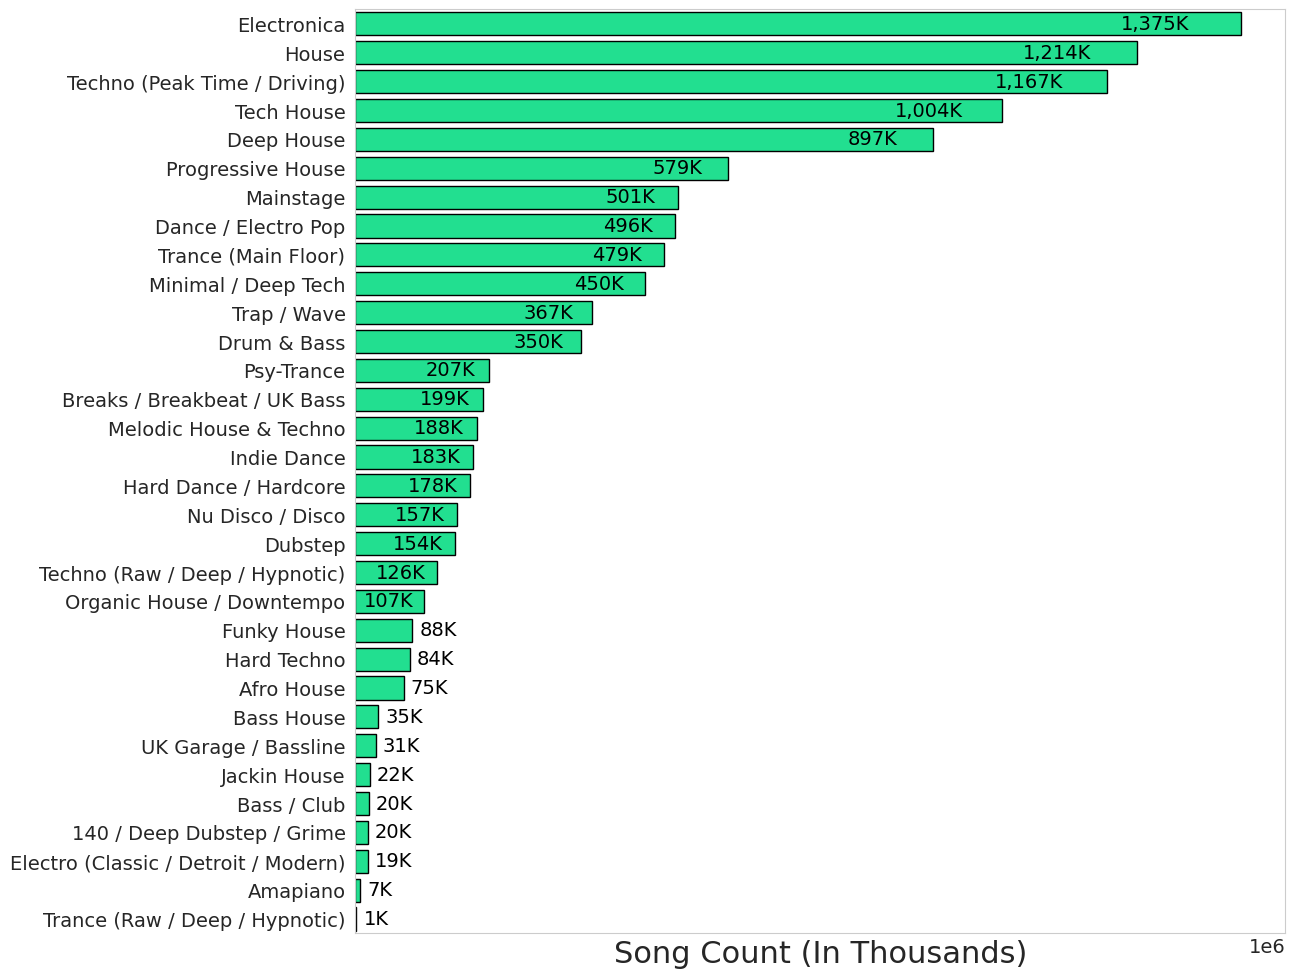

In [119]:
# Sort the DataFrame by song_count
bp_genre_sorted = bp_genre.sort_values(by='song_count', ascending=False)

# Figure size
plt.figure(figsize=(12,12))  # Adjusted for more height

# Set a custom font similar to 'Schibsted Grotesk' - the font used in my presentation
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 14  # Increase default font size for all text 

# Create a horizontal barplot with custom bar height and consistent spacing
barplot = sns.barplot(y='genre_name', x='song_count', data=bp_genre_sorted, color='#02ff95')

# Adjust space between bars by modifying the height
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=14)

# Set labels and title with larger font sizes
plt.xlabel('Song Count (In Thousands)', fontsize=22)
plt.ylabel('', fontsize=18)
plt.title('', fontsize=22)

# Remove grid lines
plt.grid(False)

# Add labels to the bars
for p in barplot.patches:
    # Add black edge around each bar
    p.set_edgecolor('black')
    
    # Round to the nearest thousand and format with 'K'
    label = f'{int(p.get_width() / 1000):,}K'
    
    # Check if the bar width is too small to fit the label
    if p.get_width() > 100000:  # Threshold to place the label inside
        barplot.annotate(label, 
                         (p.get_width() - p.get_width() * 0.05, p.get_y() + p.get_height() / 2.),  # Inside the bar
                         ha='right', va='center', 
                         fontsize=14, color='black', 
                         xytext=(-5, 0), 
                         textcoords='offset points')
    else:
        # Place label outside the bar for smaller bars
        barplot.annotate(label, 
                         (p.get_width() + 5, p.get_y() + p.get_height() / 2.),  # Just outside the bar
                         ha='left', va='center', 
                         fontsize=14, color='black', 
                         xytext=(5, 0), 
                         textcoords='offset points')

# Hidding x-tick labels because the values are visible on the graph
plt.xticks(visible=False)

# Show the plot
plt.show()

Awesome, now we know roughly how many genres there are as well as how many songs are in each genre

___________

# `bp_key`

In [120]:
bp_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   key_id               34 non-null     int64 
 1   key_letter           34 non-null     object
 2   key_name             34 non-null     object
 3   camelot_num          34 non-null     int64 
 4   camelot_letter       34 non-null     object
 5   is_sharp             34 non-null     object
 6   is_flat              34 non-null     object
 7   chord_id             34 non-null     int64 
 8   chord_name           34 non-null     object
 9   scale_numeric_value  34 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 2.8+ KB


In [121]:
bp_key.head(2)

,key_id,key_letter,key_name,camelot_num,camelot_letter,is_sharp,is_flat,chord_id,chord_name,scale_numeric_value
0,1,A,Ab Minor,1,A,f,t,1,Minor,17
1,2,E,Eb Minor,2,A,f,t,1,Minor,7


Similar to the last time, lets go over the different columns that we have here:

- `key_id` -> This is an id number linked to the key name, the numbers are barely considered integers as they are only used to signify a specific key name and have no value outside of that
- `key_letter` -> This column contains the letter of the musical key. Musical keys are denoted by letters such as A, B, C, D, E, F, G, which correspond to notes on the musical scale.
- `key_name` -> This represents the full name of the musical key, including the letter and whether it is major or minor.
- `camelot_num` -> This column likely represents the Camelot number associated with the key. The Camelot wheel is a system used by DJs to mix songs in compatible keys.
- `camelot_letter` -> This refers to the letter part of the Camelot notation (either "A" for minor or "B" for major). Together with the camelot_num, this forms the full Camelot key (e.g., "1A" represents A Minor, and "1B" represents C Major).
- `is_sharp` -> This is a boolean flag represented by 't' for `True` and 'f' for `False`.
- `is_flat` -> This is also a boolean flag represented by 't' for `True` and 'f' for `False`.
- `chord_id` -> This represents a unique identifier for the associated chord.
- `chord_name` -> Chords can be either major (happy/bright sound) or minor (sad/darker sound), and this column indicates which.
- `scale_numeric_value` -> This represents a numeric value associated with the scale, key and pitch. Personally, I used it for sorting and ordering purposes.

In this notebook, we can keep all of these columns as they all have there own meanings and can mean more to an individual with a mastery in music knowledge, but later on I will only end up using `key_id` and `scale_numeric_value`

I want to take a moment to talk about `scale_numeric_value`. The idea with this column was to create a linear value scale for songs with similar keys. My goal with this was almsot to say that a these 2 keys are similar in pitch they should have the similar numeric value. The values go from 1 to 24 with 1 being the highest pitch chord you can play *C Minor* and 24 being the lowest pitches chord you can play *B major*

When two chords were the exact same, such as *C# Minor* and *Db Minor* they recieved the same numeric values.

Here you can see the distribution of numeric values for all the different chords and keys in the dataset

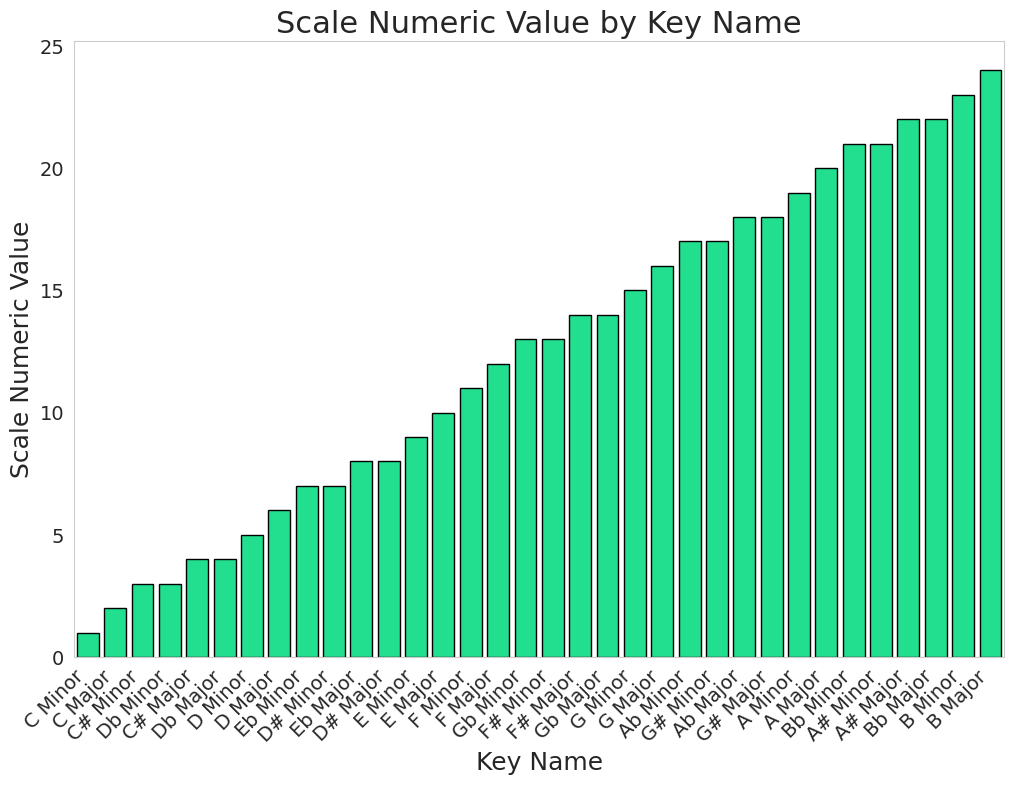

In [122]:
# Sort the DataFrame by scale_numeric_value for better visualization
bp_key_sorted = bp_key.sort_values(by='scale_numeric_value', ascending=True)

# Set plot size
plt.figure(figsize=(12, 8))

# Set a custom font similar to 'Schibsted Grotesk'
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 14  # Increase default font size for all text elements

# Create a vertical barplot for scale_numeric_value vs key_name
barplot = sns.barplot(x='key_name', y='scale_numeric_value', data=bp_key_sorted, color='#02ff95')

# Set labels and title with larger font sizes
plt.xlabel('Key Name', fontsize=18)
plt.ylabel('Scale Numeric Value', fontsize=18)
plt.title('Scale Numeric Value by Key Name', fontsize=22)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Remove grid lines
plt.grid(False)

# Add a black edge around each bar
for p in barplot.patches:
    p.set_edgecolor('black')

# Show the plot
plt.show()

___________

# `bp_song`

Next up is `bp_song`, this is one of my custom made datasets that is used specifically in the recommender system

In [123]:
bp_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10685331 entries, 0 to 10685330
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   track_id  int64 
 1   song      object
dtypes: int64(1), object(1)
memory usage: 163.0+ MB


In [124]:
bp_song.head(2)

,track_id,song
0,4971,Beatfreaker by Steve Smooth
1,4972,Beatfreaker by Steve Smooth


As you can see there are only 2 columns in this dataset `track_id` and `song`. `track_id` is the main number that is used to identify every song that is in my dataset. While `song` is a combination of the track name as well as the artists that created it.

So here, in this notebook, there isnt really much to do with this dataset except count how many songs I've included in my dataset

In [125]:
# Count the number of rows in the dataset
bp_song.shape[0]

10685331

Its a little hard to see because its so small but this dataset has **10,685,331** Songs

______________

# `bp_tabular`

Next, we have bp_tabular, this is another one that I created in my modelling process and recommendation system. Specifically, this is the dataset in the python file for the web app that is used for the tabular model.

This dataset was created after using my [Tabular Model](Tabular%20Model.ipynb)

In [126]:
bp_tabular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10679020 entries, 0 to 10679019
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   track_id  int64 
 1   genre_id  int64 
 2   bpm       int64 
 3   key_id    int64 
 4   Cluster   int64 
 5   song      object
dtypes: int64(5), object(1)
memory usage: 488.8+ MB


In [127]:
bp_tabular.head(2)

,track_id,genre_id,bpm,key_id,Cluster,song
0,17775434,99,130,20,3,Navigator 3000 by Abdul Raeva
1,17610335,99,124,4,2,Nehorah by Ormus


This dataset has 6 unique columns that we can work with

- `track_id` -> The main number that is used to identify every song that is in my dataset. For this dataset, it is used to get the `song` when running the recommendation system
- `genre_id` -> In this dataset, this number is just a genre identifier. Now that we already have the number of songs in each genre, we can really get rid of this column
- `bpm` -> Beats per Minute, this is a statistic that was used in the tabular model that helped determine which songs were closely related to one another.
- `key_id` -> This was originally the `key_id` that was found in the `bp_key` dataset but it has since been remapped to the `scale_numeric_value` column from that dataset. This was also a statistic that was used to determine how closely related songs were to one another.
- `Cluster` -> This is the assigned cluster for each song, these clusters were assigned using KMeans and MiniBatchesKMeans.
- `song` -> This column was grabbed from the `bp_song` dataset

Let's drop some of the columns that are useless to us here in this notebook

In [128]:
bp_tabular.drop(columns=['track_id','genre_id', 'song'], inplace=True, axis=1)

Now lets visualize some of the remaining columns that we have

First lets look at how many songs are in each cluster

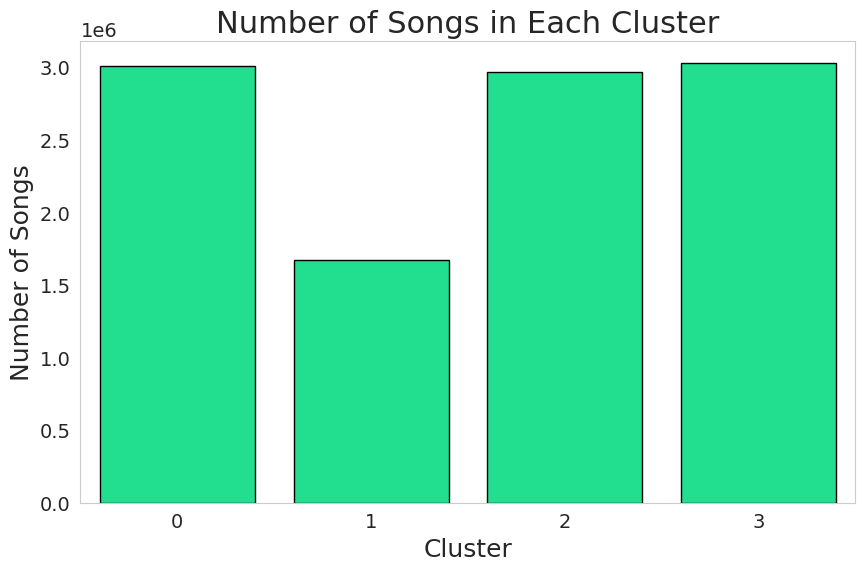

In [129]:
# Set the plot size and the font style
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Use the same font style as before
plt.rcParams['font.size'] = 14  # Larger font for readability

# Create a count plot for the 'Cluster' column in bp_tabular
sns.countplot(x='Cluster', data=bp_tabular, color='#02ff95', edgecolor='black')

# Set labels and title
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Number of Songs', fontsize=18)
plt.title('Number of Songs in Each Cluster', fontsize=22)

# Remove grid lines for a cleaner look
plt.grid(False)

# Display the plot
plt.show()

Before going any further, I want to take a sample of my dataset and it for these steps as the original dataset is simply too large.

In [130]:
bp_tabular_sample = bp_tabular.sample(n=10000, random_state=42)

Now lets look at the distribution of BPM

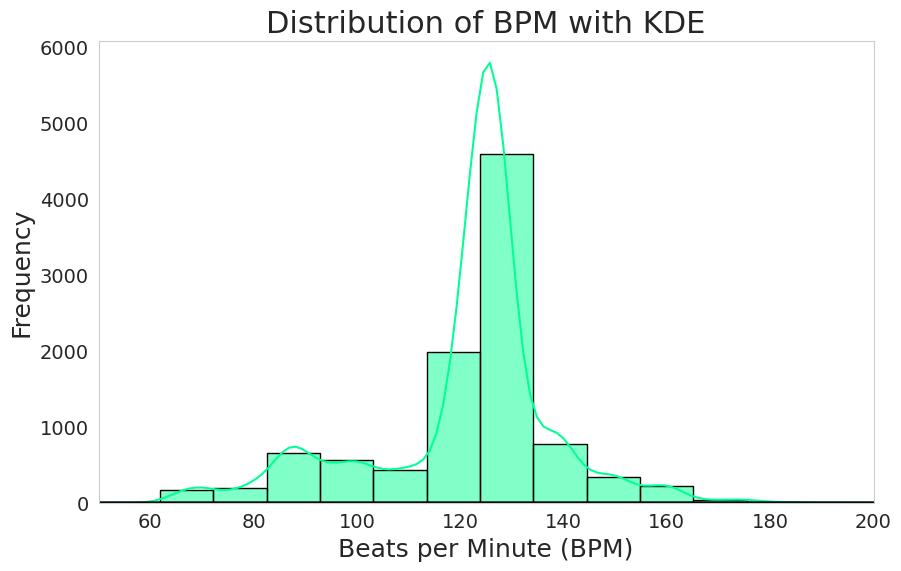

In [131]:
# Set the plot size and the font style
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Similar font style as before
plt.rcParams['font.size'] = 14  # Larger font for readability

# Create a histogram with a KDE line for the 'bpm' column
sns.histplot(bp_tabular_sample['bpm'], kde=True, color='#02ff95', edgecolor='black', bins=25)

# Set labels and title
plt.xlabel('Beats per Minute (BPM)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Distribution of BPM with KDE', fontsize=22)

# Limit x-axis to 50-200
plt.xlim(50, 200)

# Customize the KDE line with a black outline
kde_line = sns.kdeplot(bp_tabular_sample['bpm'], color='black', linewidth=2, bw_adjust=.5)

# Remove grid lines for a cleaner look
plt.grid(False)

# Show the plot
plt.show()


That's the overall distribution of bpm. But more importantly, I want to perform an ANOVA Test to see if the clusters that I've created in my [Tabular Model](Tabular%20Model.ipynb) are significantly different from each other

In [132]:
# Function to perform 4-way ANOVA and plot KDE curves
def four_way_ANOVA(bp_tabular, variable='bpm', save=False):
    # Extract the different clusters from the dataset
    dataset1 = bp_tabular[bp_tabular['Cluster'] == 0][variable]
    dataset2 = bp_tabular[bp_tabular['Cluster'] == 1][variable]
    dataset3 = bp_tabular[bp_tabular['Cluster'] == 2][variable]
    dataset4 = bp_tabular[bp_tabular['Cluster'] == 3][variable]

    # Calculate the means of each dataset
    mean1 = np.mean(dataset1)
    mean2 = np.mean(dataset2)
    mean3 = np.mean(dataset3)
    mean4 = np.mean(dataset4)

    # Perform 4-way ANOVA
    _, p_value = stats.f_oneway(dataset1, dataset2, dataset3, dataset4)
    if p_value < 0.05:
        print('Reject the Null Hypothesis (at least one group is significantly different)')
    else:
        print('Fail to reject the Null Hypothesis (no significant difference)')

    plt.figure(figsize=(12, 8))

    # Plot KDE curves for each dataset
    sns.kdeplot(dataset1, label='Cluster 0', color='red', alpha=1)
    sns.kdeplot(dataset2, label='Cluster 1', color='blue', alpha=1)
    sns.kdeplot(dataset3, label='Cluster 2', color='green', alpha=1)
    sns.kdeplot(dataset4, label='Cluster 3', color='purple', alpha=1)

    # Compute KDE values for each dataset
    kde_dataset1 = stats.gaussian_kde(dataset1)
    kde_dataset2 = stats.gaussian_kde(dataset2)
    kde_dataset3 = stats.gaussian_kde(dataset3)
    kde_dataset4 = stats.gaussian_kde(dataset4)

    # Generate x values for KDE
    x_vals = np.linspace(min(min(dataset1), min(dataset2), min(dataset3), min(dataset4)),
                         max(max(dataset1), max(dataset2), max(dataset3), max(dataset4)), 1000)

    # Fill the entire area under the curves
    plt.fill_between(x_vals, kde_dataset1(x_vals), color='red', alpha=0.3)
    plt.fill_between(x_vals, kde_dataset2(x_vals), color='blue', alpha=0.3)
    plt.fill_between(x_vals, kde_dataset3(x_vals), color='green', alpha=0.3)
    plt.fill_between(x_vals, kde_dataset4(x_vals), color='purple', alpha=0.3)

    # Get KDE values at means
    kde_dataset1_at_mean1 = kde_dataset1(mean1)[0]
    kde_dataset2_at_mean2 = kde_dataset2(mean2)[0]
    kde_dataset3_at_mean3 = kde_dataset3(mean3)[0]
    kde_dataset4_at_mean4 = kde_dataset4(mean4)[0]

    # Add vertical lines at the means, stopping at the KDE curves
    plt.plot([mean1, mean1], [0, kde_dataset1_at_mean1], 'r--', label=f'Cluster 0 Mean: {mean1:.2f}')
    plt.plot([mean2, mean2], [0, kde_dataset2_at_mean2], 'b--', label=f'Cluster 1 Mean: {mean2:.2f}')
    plt.plot([mean3, mean3], [0, kde_dataset3_at_mean3], 'g--', label=f'Cluster 2 Mean: {mean3:.2f}')
    plt.plot([mean4, mean4], [0, kde_dataset4_at_mean4], 'purple', linestyle='--', label=f'Cluster 3 Mean: {mean4:.2f}')

    # Add labels and title
    plt.title(f'Distribution of {variable} by Cluster', fontsize=20, fontweight='bold')
    plt.xlabel(variable.capitalize(), fontsize=16)
    plt.ylabel('Density', fontsize=16)

    # Add annotations
    plt.annotate(f'Cluster 0 | Mean: {mean1:.2f}', xy=(0.75, 0.85), xycoords='axes fraction', color='red', fontsize=12,
                 bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
    plt.annotate(f'Cluster 1 | Mean: {mean2:.2f}', xy=(0.75, 0.75), xycoords='axes fraction', color='blue', fontsize=12,
                 bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
    plt.annotate(f'Cluster 2 | Mean: {mean3:.2f}', xy=(0.75, 0.65), xycoords='axes fraction', color='green', fontsize=12,
                 bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
    plt.annotate(f'Cluster 3 | Mean: {mean4:.2f}', xy=(0.75, 0.55), xycoords='axes fraction', color='purple', fontsize=12,
                 bbox=dict(facecolor='white', edgecolor='purple', boxstyle='round,pad=0.5'))

    # Save the plot if required
    if save:
        plt.savefig(f'Four_Way_ANOVA_{variable}.png', transparent=True)

    # Show the plot
    plt.show()

Reject the Null Hypothesis (at least one group is significantly different)


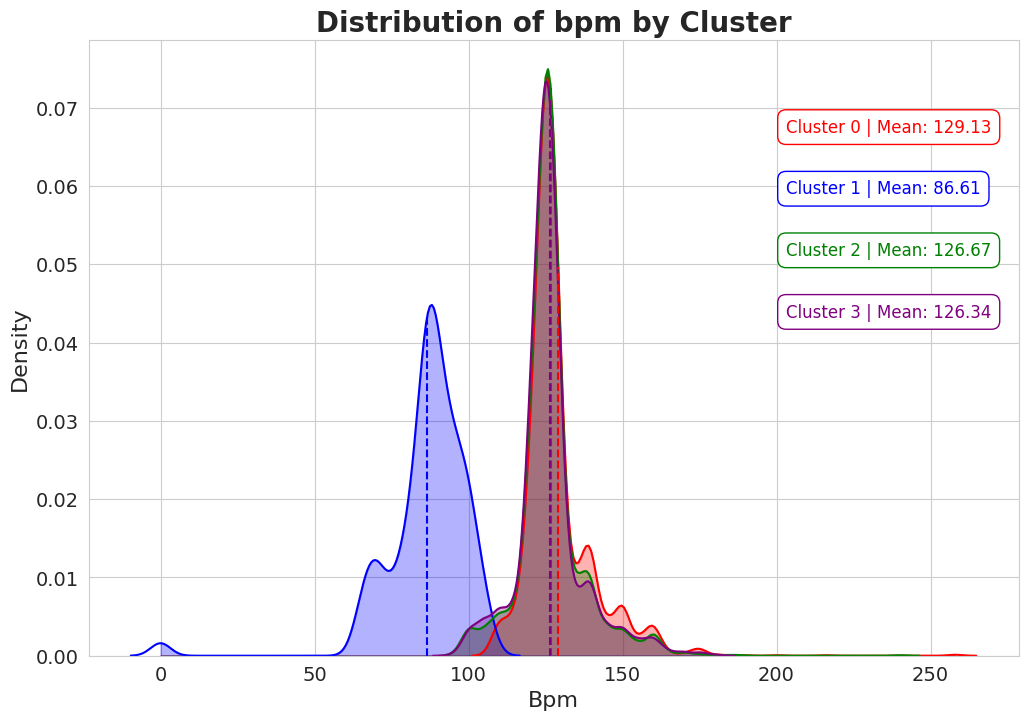

In [133]:
four_way_ANOVA(bp_tabular_sample, variable='bpm')

We are able to reject the Null Hypothesis! This means that there is an observable differnece between the mean bpm of at least one cluster. In this case, we can see it was CLuster 1 that is disticively different.

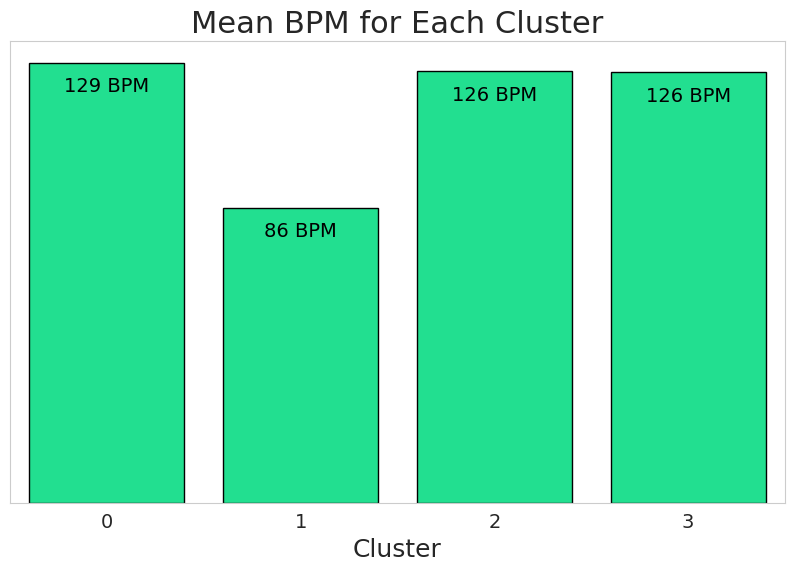

In [134]:
# Set the plot size and the font style
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Use the same font style as before
plt.rcParams['font.size'] = 14  # Larger font for readability

# Create a bar plot for the mean BPM by Cluster
barplot = sns.barplot(x='Cluster', y='bpm', data=bp_tabular_sample, estimator=np.mean, ci=None, color='#02ff95', edgecolor='black')

# Set labels and title
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('', fontsize=18)
plt.title('Mean BPM for Each Cluster', fontsize=22)
plt.yticks(visible=False)

# Remove grid lines for a cleaner look
plt.grid(False)

# Add labels to the bars (rounded to the nearest whole number)
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)} BPM', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='top', 
                     fontsize=14, color='black', 
                     xytext=(0, -10),  # Position the text just inside the bar
                     textcoords='offset points')

# Display the plot
plt.show()

Now we have a good idea of what the BPM looks like in each cluster, lets move on to the Key

first lets start with the overall distribution of key_id

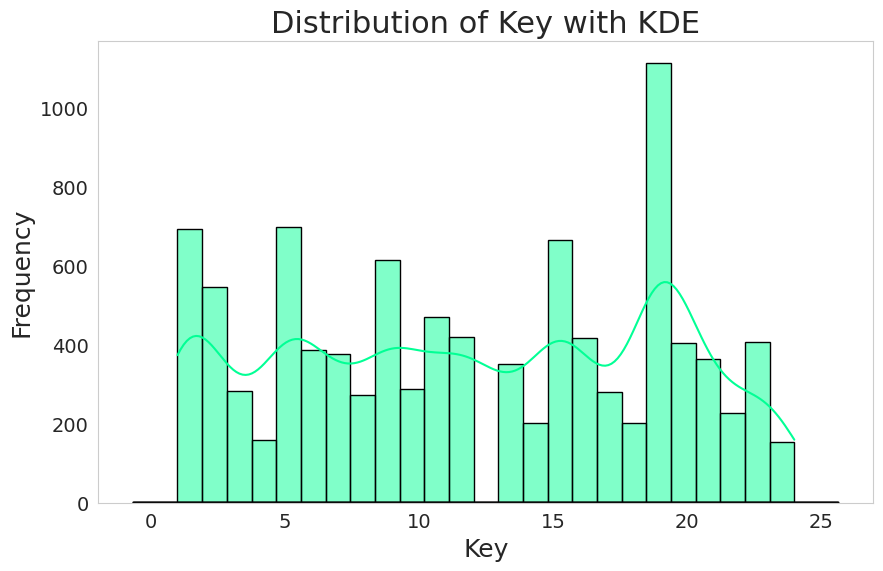

In [135]:
# Set the plot size and the font style
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Similar font style as before
plt.rcParams['font.size'] = 14  # Larger font for readability

# Create a histogram with a KDE line for the 'bpm' column
sns.histplot(bp_tabular_sample['key_id'], kde=True, color='#02ff95', edgecolor='black', bins=25)

# Set labels and title
plt.xlabel('Key', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Distribution of Key with KDE', fontsize=22)

# Customize the KDE line with a black outline
kde_line = sns.kdeplot(bp_tabular_sample['key_id'], color='black', linewidth=2, bw_adjust=.5)

# Remove grid lines for a cleaner look
plt.grid(False)

# Show the plot
plt.show()

This has a weird distribution becuase that is the nature of the data, the mean key technically doesnt have any musical meaning to it but for us it is useful to get a better idea of what keys are being used in each cluster

Reject the Null Hypothesis (at least one group is significantly different)


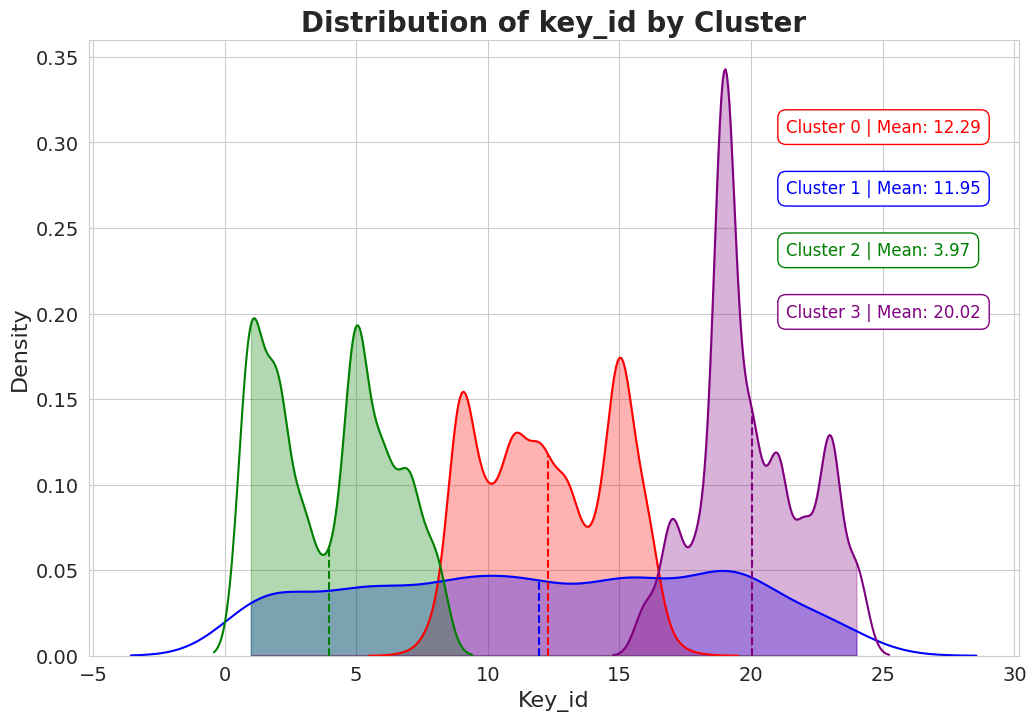

In [136]:
four_way_ANOVA(bp_tabular_sample, variable='key_id')

Again, we can reject the null hypothesis and as we can see in the distribution, each of the clusters are different from each other and then there is cluster 1 which had a significantly different BPM that has a very wide spread of keys

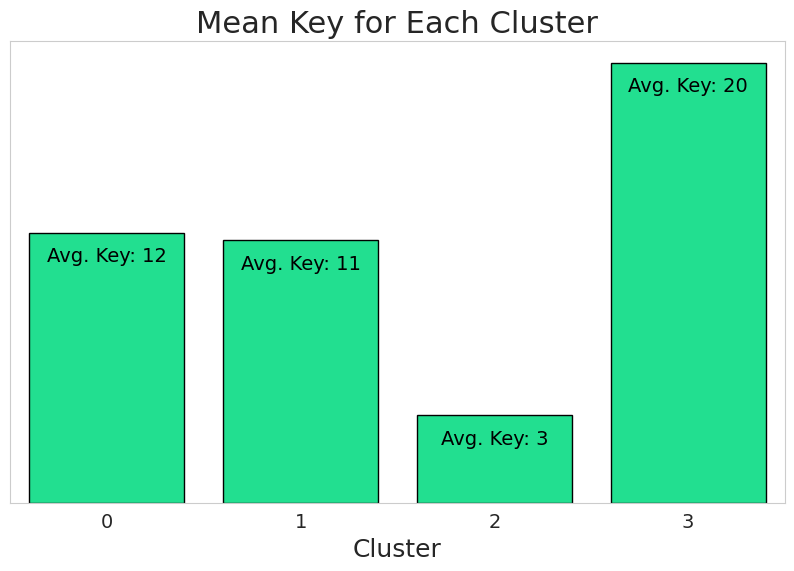

In [137]:
# Set the plot size and the font style
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Use the same font style as before
plt.rcParams['font.size'] = 14  # Larger font for readability

# Create a bar plot for the mean BPM by Cluster
barplot = sns.barplot(x='Cluster', y='key_id', data=bp_tabular_sample, estimator=np.mean, ci=None, color='#02ff95', edgecolor='black')

# Set labels and title
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('', fontsize=18)
plt.title('Mean Key for Each Cluster', fontsize=22)
plt.yticks(visible=False)

# Remove grid lines for a cleaner look
plt.grid(False)

# Add labels to the bars (rounded to the nearest whole number)
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'Avg. Key: {int(height)}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='top', 
                     fontsize=14, color='black', 
                     xytext=(0, -10),  # Position the text just inside the bar
                     textcoords='offset points')

# Display the plot
plt.show()

We were able to get a lot of information out of this dataset! But its time to move on.

__________

# `bp_track_media`

In [138]:
bp_track_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10685331 entries, 0 to 10685330
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   track_id       int64  
 1   wave_img_id    float64
 2   wave_img_uuid  object 
 3   sample_uuid    object 
 4   sample_start   float64
 5   sample_end     float64
 6   updated_on     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 570.7+ MB


In [139]:
bp_track_media.head(2)

,track_id,wave_img_id,wave_img_uuid,sample_uuid,sample_start,sample_end,updated_on
0,17767172,34401296.0,09d00050-0a43-42f1-bb6e-c22bf9591a80,09d00050-0a43-42f1-bb6e-c22bf9591a80,172732.0,292732.0,2023-09-14 16:19:56
1,17775434,34430784.0,b9509b0f-2b7d-4254-84df-cc53eded7904,b9509b0f-2b7d-4254-84df-cc53eded7904,163532.0,283532.0,2023-09-14 16:19:56


This dataset is used solely for getting media that is attached to a specific track. This dataset is what I used to get the audio features in my [Audio Model](Audio%20Model.ipynb) and also my image features in [Image Model](Image%20Model.ipynb)

Lets do an example. Here, I'm pulling a specific image from my computer using the track_id associated with it.

Lets also do a well know song. How about **Sandstorm by Darude**

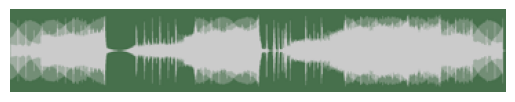

In [140]:
# Find the image ID corresponding to the track_id
img_id = bp_track_media.loc[bp_track_media['track_id'] == 5581162, 'wave_img_uuid'].values[0]
img_filename = os.path.join("static/image_files/", f"{img_id}.png")

# Check if the image is already downloaded and load it
if os.path.exists(img_filename):
    # Load the image
    img = Image.open(img_filename).convert('RGB')
    img = img.resize((360, 60))
    img_array = np.array(img)
    
    # Display the image
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()

Every pixel of an image is made up of red, green and blue (RGB) values. So each song has different amounts of red content, blue content and green content. 

Lets see **Sandstorm by Darude's** RGB content

In [141]:
red_mean = np.mean(img_array[:, :, 0])  # Mean of the Red channel
green_mean = np.mean(img_array[:, :, 1])  # Mean of the Green channel
blue_mean = np.mean(img_array[:, :, 2])  # Mean of the Blue channel

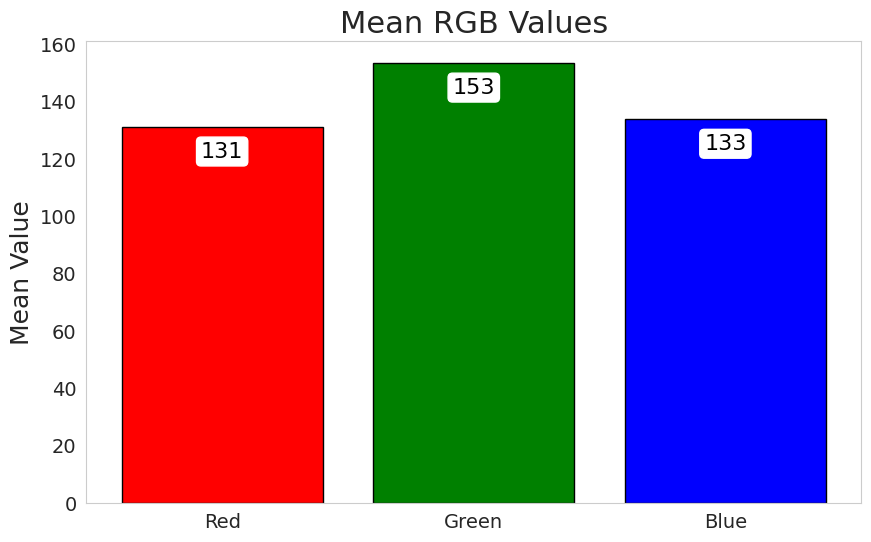

In [142]:
# Create a list of mean values
rgb_means = [red_mean, green_mean, blue_mean]

# Create labels for the bars
labels = ['Red', 'Green', 'Blue']

# Set the colors for each bar
colors = ['red', 'green', 'blue']

# Set the plot size and style (same as the previous graphs)
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Same font style as before
plt.rcParams['font.size'] = 14  # Larger font for readability

# Create the bar plot
barplot = plt.bar(labels, rgb_means, color=colors, edgecolor='black')

# Set labels and title
plt.ylabel('Mean Value', fontsize=18)
plt.title('Mean RGB Values', fontsize=22)

# Remove grid lines for a cleaner look (consistent with the previous graphs)
plt.grid(False)

# Add larger labels inside the bars, with a white outline
for bar in barplot:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height - 5),  # Move label inside the bar
                 ha='center', va='top', 
                 fontsize=16, color='black', 
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))  # White outline

# Show the plot
plt.show()

Interesting!!

So thats a pretty cool example of the the data that was used to create the clusters for the [Image Model](Image%20Model.ipynb)

Now lets do an audio example!

In [143]:
save_directory = "static/audio_files"

# Find the row for the specific track_id
row = bp_track_media[bp_track_media['track_id'] == 5581162].iloc[0]
sample_uuid = row['sample_uuid']

# Construct full audio URL and the save path
audio_file_path = os.path.join(save_directory, f"{sample_uuid}.mp3")\

display(Audio(audio_file_path))

That's pretty cool, we can listen to our audio inside of the notebook. 

Next what we need is the audio features that we can use in our model. There are 2 types of features that I used. MFCC features and Chroma features. MFCC stands for Mel-Frequency Cepstral Coefficients. For us it will seem like a bunch of random numbers as they are designed to help machines learn more about the audio features that it hears. And then Chroma features which represent the energy of each of the 12 pitch classes

We are going to start with MFCC features

The numbers themselves dont mean too much to us, but what we can do is plot them in a heatmap of a spectogram-like graph

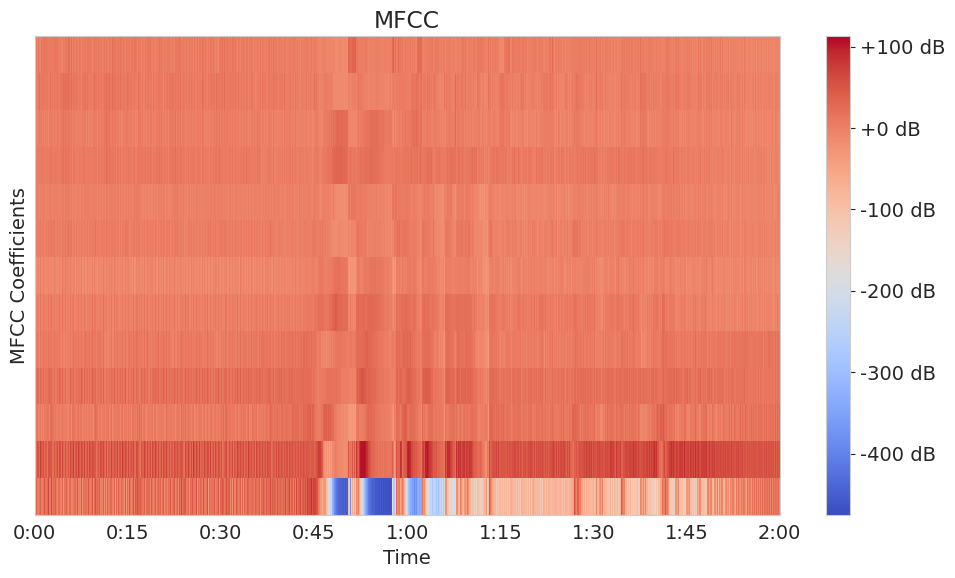

In [144]:
# Load the audio file
y, sr = librosa.load(audio_file_path, sr=16000)  # y is the time series, sr is the sample rate

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Create a plot to visualize the MFCCs
plt.figure(figsize=(10, 6))

# Display the MFCCs as a heatmap
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='coolwarm')

# Add a color bar and labels
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()

# Show the plot
plt.show()

This is a bit hard to understand because to put it simply, this type of data wasn't designed for us to understand but it helps the machine model understand the data better which is why its included in the dataset. Lets move to Chroma features whicha are a bit easier for us to grasp

In simple terms, Chroma features measure how well we can hear the certain pitches at various points in the audio.

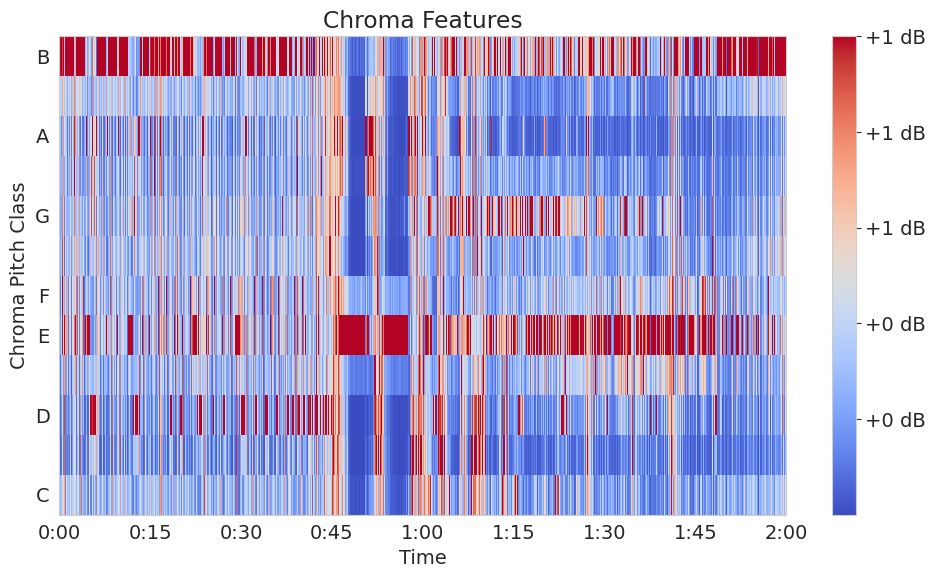

In [145]:
# Load the audio file
y, sr = librosa.load(audio_file_path, sr=16000)

# Extract Chroma features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Create a plot to visualize the Chroma features
plt.figure(figsize=(10, 6))

# Display the Chroma features as a heatmap
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', cmap='coolwarm', sr=sr)

# Add a color bar and labels
plt.colorbar(format='%+2.0f dB')
plt.title('Chroma Features')
plt.xlabel('Time')
plt.ylabel('Chroma Pitch Class')
plt.tight_layout()

# Show the plot
plt.show()

In this graph the dark blue area shows the lack of that pitch at that certain time period while the dark red shows the greater presence of that pitch.

This helps my model create similarity between songs as if they have similar pitches playing at similar times then there is a greater chance that those 2 songs are more similar!

Alright, now that we've gone through how the get information, lets look at the clusters the model created and see if they are significant differences in the the values. For the image data we are able to do this because we have the image rgb features but since we have to heavily manipulate the chroma data and mfcc data we dont have that data in a format where we can assign it to clusters yet (I'm working on it). So lets start with RGB features

___________

# `bp_rgb`

In [146]:
bp_rgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39631 entries, 0 to 39630
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Red      39631 non-null  float64
 1   Green    39631 non-null  float64
 2   Blue     39631 non-null  float64
 3   Cluster  39631 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 1.2 MB


In [154]:
bp_rgb.head(2)

,Red,Green,Blue,Cluster
0,108.079074,137.559630,111.675093,2
1,137.114120,157.577824,139.601898,1


In [155]:
bp_rgb['Cluster'] = bp_rgb['Cluster'].astype(int)

since this is new data, I didnt want to restrict it to the same clusters as the tabular data. So lets start by taking a quick look at the count for each cluster

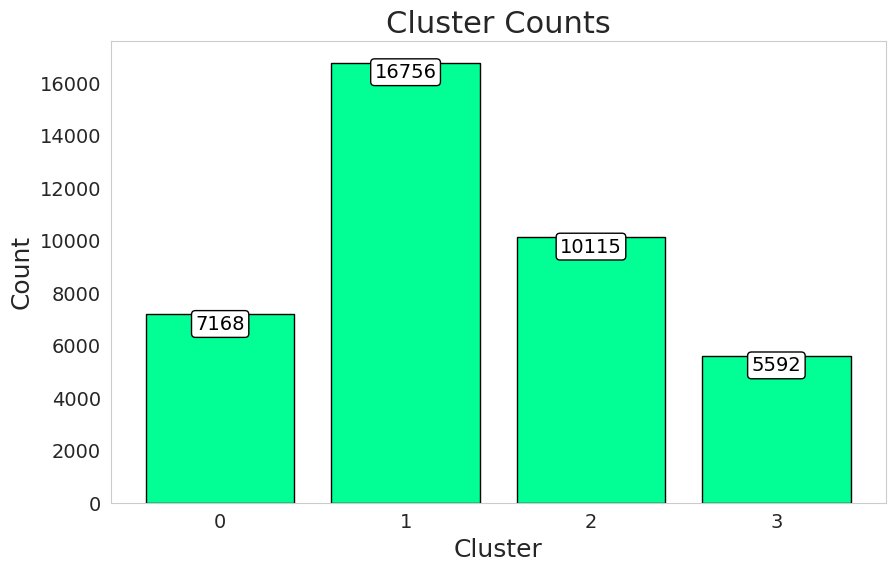

In [171]:
# Count the number of occurrences of each cluster
cluster_counts = bp_rgb['Cluster'].value_counts().sort_index()

# Set the plot size and style (same as the previous graphs)
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Same font style as before
plt.rcParams['font.size'] = 14  # Larger font for readability

# Create the bar plot
barplot = plt.bar(cluster_counts.index, cluster_counts.values, color='#02ff95', edgecolor='black')

# Set labels and title
plt.ylabel('Count', fontsize=18)
plt.xlabel('Cluster', fontsize=18)
plt.xticks([0,1,2,3])
plt.title('Cluster Counts', fontsize=22)

# Remove grid lines for a cleaner look (consistent with the previous graphs)
plt.grid(False)

# Add labels to the bars (count values inside the bars)
for bar in barplot:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),  # Positioning inside the bar
                 ha='center', va='top', 
                 fontsize=14, color='black',  # Font styling
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))  # White outline for visibility

# Show the plot
plt.show()

Now that we have this lets perform an ANOVA test to see if they are significantly differenet

Reject the Null Hypothesis (at least one group is significantly different)


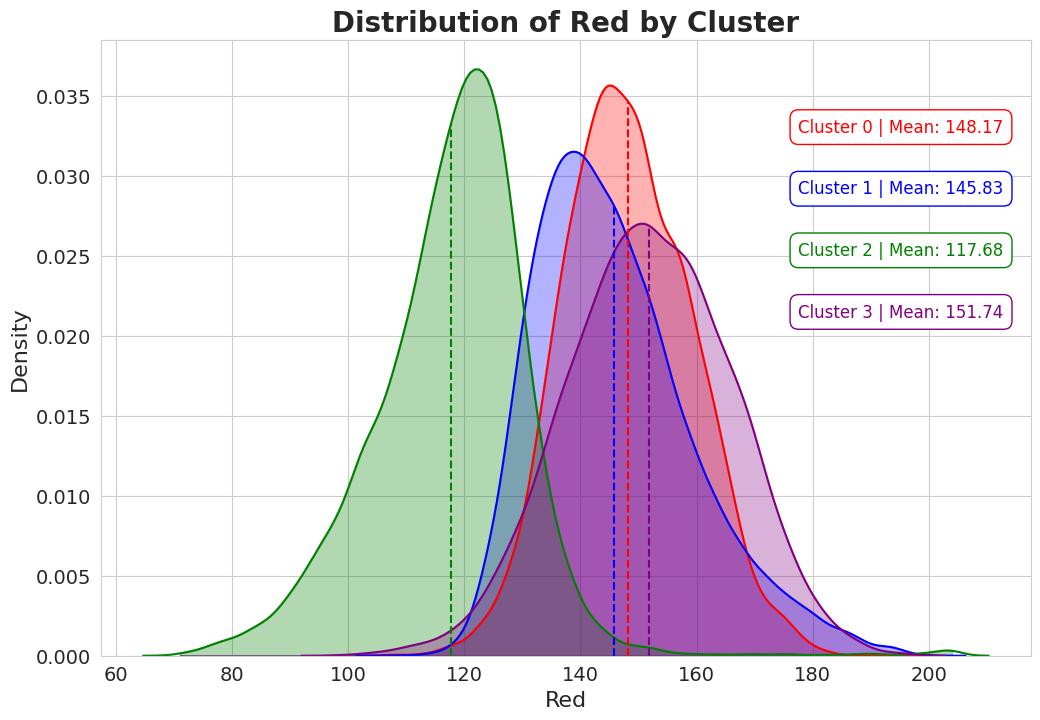

In [156]:
four_way_ANOVA(bp_tabular=bp_rgb, variable='Red')

Reject the Null Hypothesis (at least one group is significantly different)


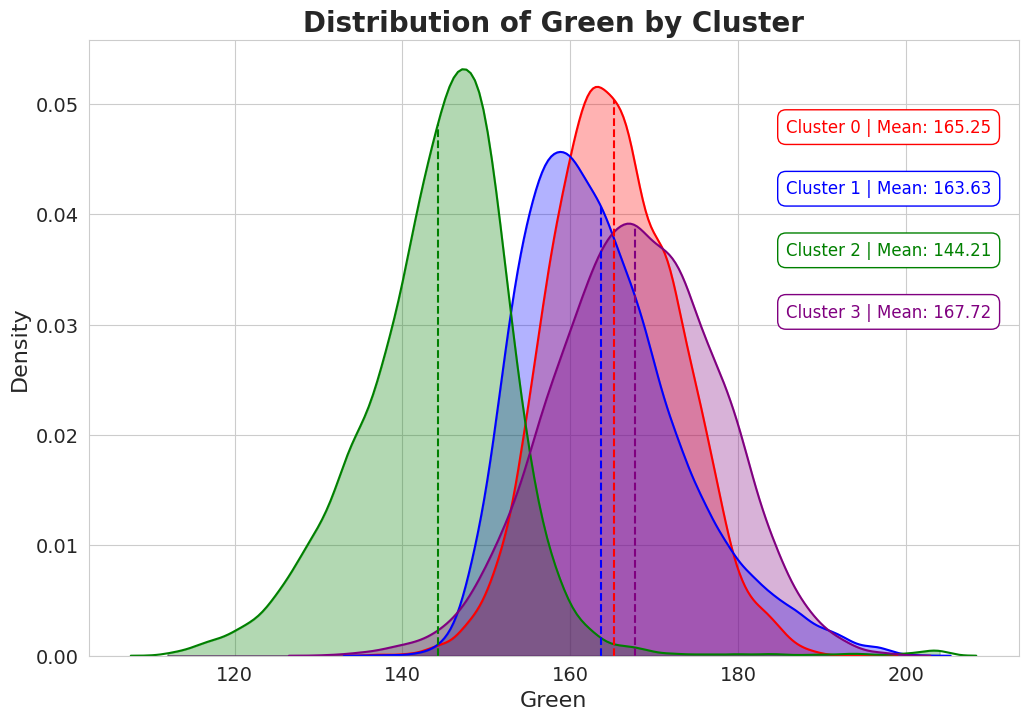

In [157]:
four_way_ANOVA(bp_tabular=bp_rgb, variable='Green')

Reject the Null Hypothesis (at least one group is significantly different)


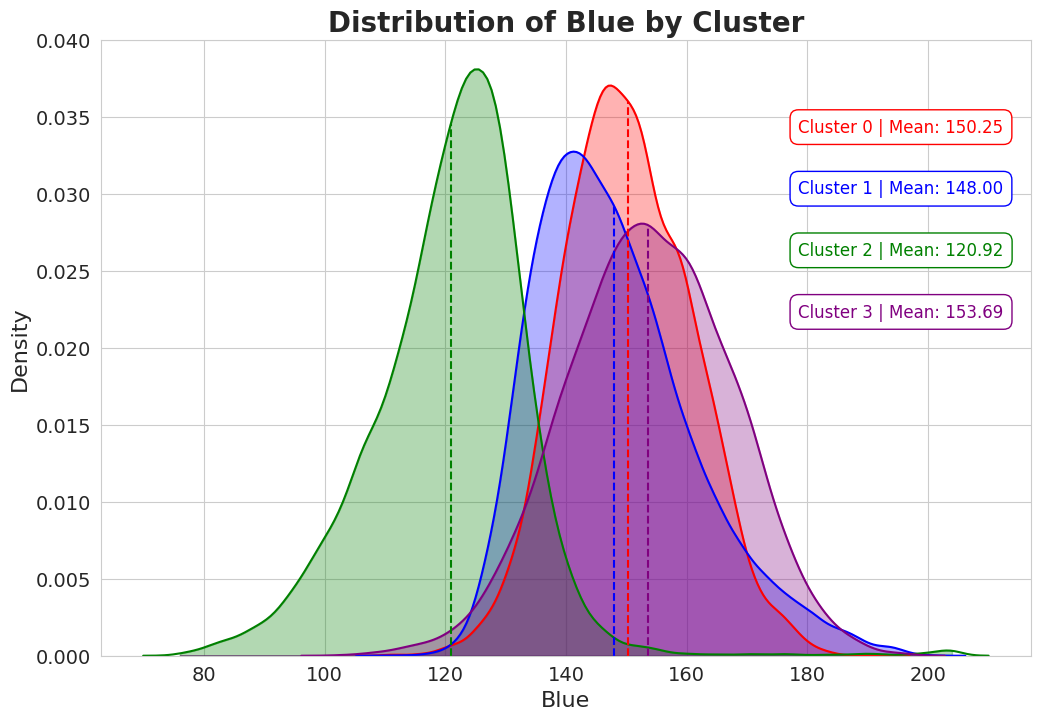

In [158]:
four_way_ANOVA(bp_tabular=bp_rgb, variable='Blue')

After performing the 3 ANOVA tests on each of the color features. We can see that for each of them there is a significant difference!

Lets visualize it a little bit better

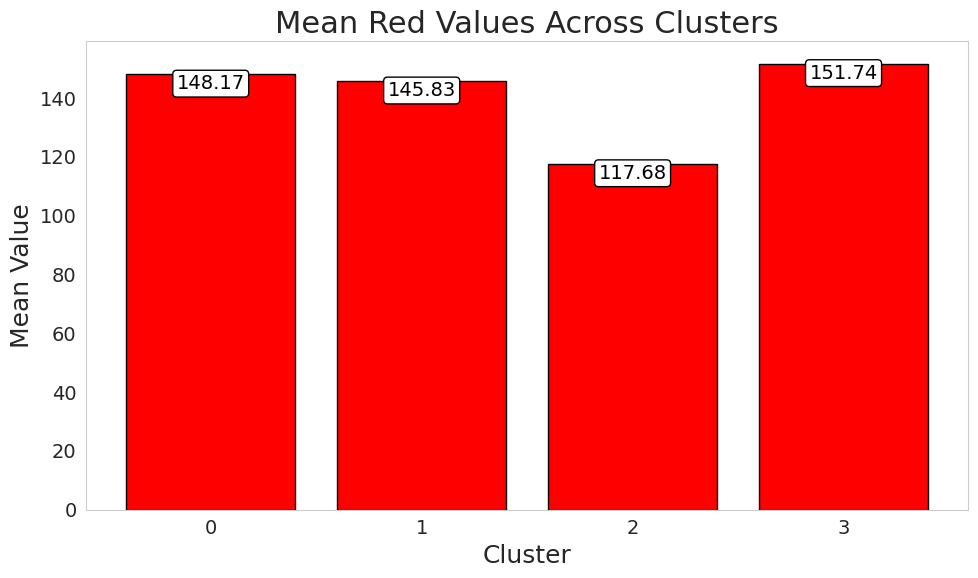

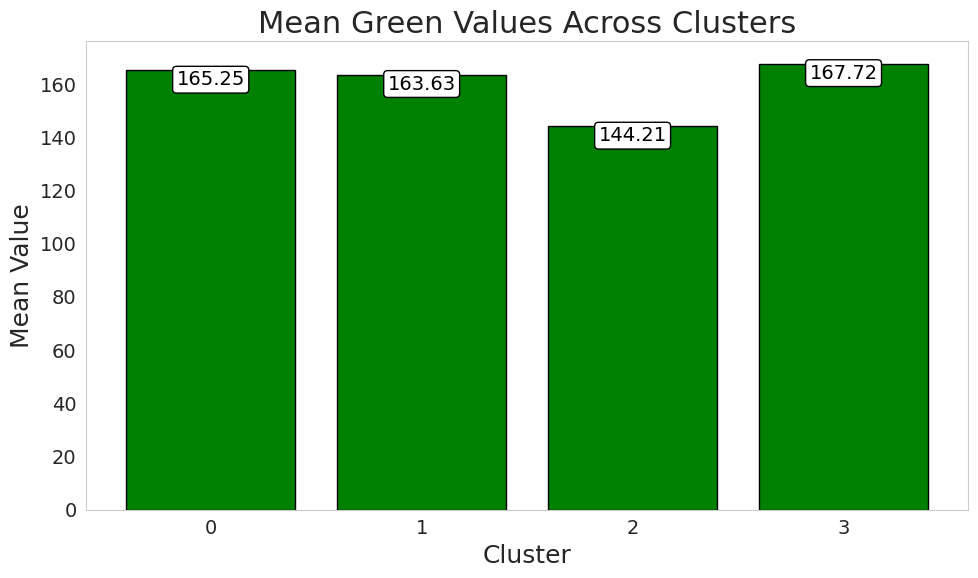

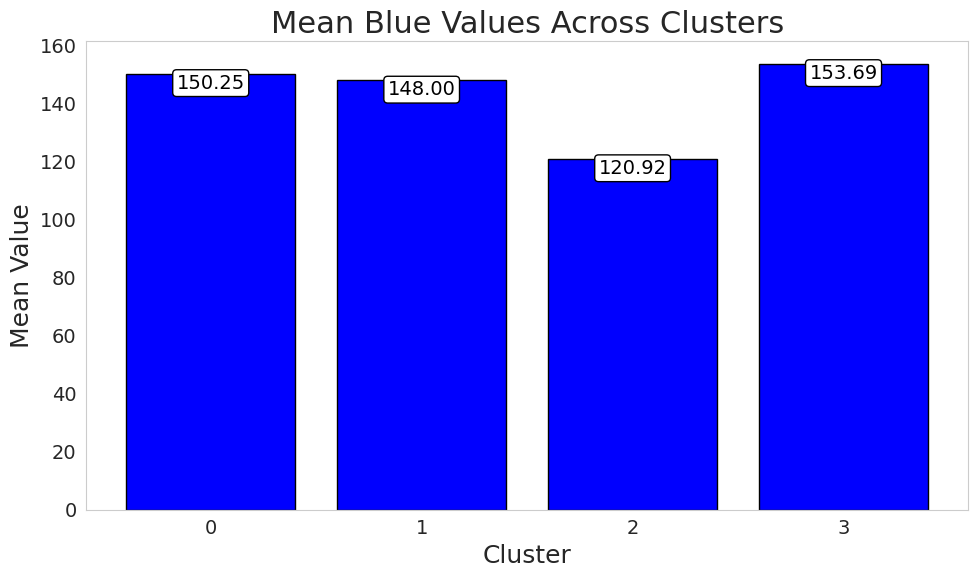

In [161]:
# Group the data by 'Cluster' and compute the mean of Red, Green, and Blue
rgb_means = bp_rgb.groupby('Cluster').mean()[['Red', 'Green', 'Blue']]

# Plotting function for each channel
def plot_rgb_bar(variable, color, title):
    plt.figure(figsize=(10, 6))
    plt.rcParams['font.family'] = 'DejaVu Sans'  # Same font style
    plt.rcParams['font.size'] = 14  # Larger font for readability

    # Create bar plot for the selected channel
    barplot = plt.bar(rgb_means.index, rgb_means[variable], color=color, edgecolor='black')

    # Set labels and title
    plt.ylabel('Mean Value', fontsize=18)
    plt.xlabel('Cluster', fontsize=18)
    plt.xticks([0,1,2,3])
    plt.title(f'Mean {variable} Values Across Clusters', fontsize=22)

    # Remove grid lines for cleaner look
    plt.grid(False)

    # Add labels inside the bars
    for bar in barplot:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),  # Position the label
                     ha='center', va='top', 
                     fontsize=14, color='black',  # Font styling
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))  # White outline

    # Show the plot
    plt.tight_layout()
    plt.show()

# Plot for each RGB channel
plot_rgb_bar('Red', 'red', 'Red')  # Red color
plot_rgb_bar('Green', 'green', 'Green')  # Green color
plot_rgb_bar('Blue', 'blue', 'Blue')  # Blue color


WOO! We have cleared off that dataset too, lets move onto the next

_____________

# `bp_track`

In [165]:
bp_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10685331 entries, 0 to 10685330
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         int64  
 1   title            object 
 2   mix              object 
 3   is_remixed       object 
 4   release_date     object 
 5   genre_id         int64  
 6   subgenre_id      float64
 7   track_url        object 
 8   bpm              int64  
 9   duration         object 
 10  duration_ms      float64
 11  isrc             object 
 12  key_id           float64
 13  label_id         int64  
 14  release_id       int64  
 15  updated_on       object 
 16  is_matched_spot  object 
dtypes: float64(3), int64(5), object(9)
memory usage: 1.4+ GB


In [166]:
bp_track.head(2)

,track_id,title,mix,is_remixed,release_date,genre_id,subgenre_id,track_url,bpm,duration,duration_ms,isrc,key_id,label_id,release_id,updated_on,is_matched_spot
0,17775434,Navigator 3000,Original Mix,f,2023-06-09,99,266.0,beatport.com/track/navigator-3000/17775434,130,6:48,408830.0,DECY62300081,23.0,3222,4144460,2023-09-14 16:19:56,NaN
1,17610335,Nehorah,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/nehorah/17610335,124,6:47,407439.0,GBCDK2303028,15.0,258,4091230,2023-09-14 16:19:56,NaN


This dataset was originally used as a way to connect all of the other datasets as this one has a large portion of the various IDs that were found in the original dataset. For me, this file played a major role in the process of creating any of the 'custom' datasets that I have bought up thus far. But with that being said, there is nothing for us to do now with this file!

So lets move on!

_________________

# `bp_sample_uuid`

In [168]:
bp_sample_uuid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10685331 entries, 0 to 10685330
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   track_id     int64 
 2   sample_uuid  object
dtypes: int64(2), object(1)
memory usage: 244.6+ MB


In [170]:
bp_sample_uuid.head(2)

,Unnamed: 0,track_id,sample_uuid
0,0,17767172,09d00050-0a43-42f1-bb6e-c22bf9591a80
1,1,17775434,b9509b0f-2b7d-4254-84df-cc53eded7904


Well thats embarressing, when I saved this file i forgot to exclude the index. 

Anyways this dataset is here for the web app. Basically the wrb app takes in track_ids as an input and then will use the sample_uuid to load the audio, similar to what we did earlier with Sandstorm by Darude

# Summary

I decided to structure my data analysis in a way that simply goes through each of the different datasets that I have had to use in my project.

So lets summarize what is in each.

- [`bp_genre`](#`bp_genre`) -> Here we had all of the genres and their song count. With that we created a visualization of how many songs are in each dataset
- [`bp_key`](#`bp_key`) -> To put it simply this dataset had various keys that a song could be in. Personally, I added a numeric value to each key which increases as pitch increases. I visualized this by creating a bar graph that had the numeric value of the chord and the chord name. 
- [`bp_song`](#`bp_song`) -> This is a dataset that has already been reduced to almost nothing so that it can be used fluidly for the Web App. The only thing we could still do here is get a count for the total amount of songs that are in our dataset
- [`bp_tabular`](#`bp_tabular`) -> This is where the fun really starts! Here we were able to do an inferential analysis on the features that make up the [Tabular Model](Tabular%20Model.ipynb)
    - BPM -> We are able to reject the Null Hypothesis, which states that the mean BPM for each cluster is equal. We do not know why there is a significant difference, we are simply able to observe that it exists
    - Key -> We are able to reject the Null Hypothesis, which states that the 'mean' Key for each cluster is equal. We do not know why there is a significant difference, we are simply able to observe that it exists
- [`bp_track_media`](#`bp_track_media`) -> Here we went into the data that makes up the [Audio Model](Audio%20Model.ipynb) and the [Image Model](Image%20Model.ipynb), we were able to visualize the waveform images, listen to a sample of the audio data and even visualize the MFCC and Chroma audio features that are part of the direct inputs for the audio model.
- [`bp_rgb`](#`bp_rgb`) -> With this dataset, we were able to continue the inferential part of the analysis, using the data features that make up the [Image Model](Image%20Model.ipynb)
    - Red -> We are able to reject the Null Hypothesis, which states that the mean Red content for waveform images for each cluster is equal. We do not know why there is a significant difference, we are simply able to observe that it exists
    - Green -> We are able to reject the Null Hypothesis, which states that the mean Green content for waveform images for each cluster is equal. We do not know why there is a significant difference, we are simply able to observe that it exists
    - Blue -> We are able to reject the Null Hypothesis, which states that the mean Blue content for waveform images for each cluster is equal. We do not know why there is a significant difference, we are simply able to observe that it exists
- [`bp_track`](#`bp_track`) -> This dataset has already been squeezed of any content that I could get out of it but I still wanted to present it as it was crucial in the early stages of this project and was a key part in creating any of the datasets that I personally created for this project.
- [`bp_sample_uuid`](#`bp_sample_uuid`) -> Similar to the `bp_song` this dataset has been reduced to almost nothing because it purpose lays within the Web App.

# Conclusion